In [1]:
# import packages
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
from pmdarima.arima import auto_arima

# for calculation
from math import sqrt
from sklearn.metrics import mean_squared_error

# to plot within notebook
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('105v2.csv', parse_dates=True, index_col='DateTime',encoding="windows-1252") # или 105
df.head(5)

,AffinityIndex,SerialNumber,H,Tmean,WmeanH,WindDirectionH(Â°),WminH,WmaxH,WmeanV,AtmosphericPressure,RelativeHumidity,TdewPoint(Â°C),WaterVaporElasticity,AbsolutusHumidity,DensityofAir,SpeedofSoundinAir
DateTime,,,,,,,,,,,,,,,,
2017-07-22 00:01:00,6,12427AMK-03,15,15.86,0.20,94.53,0.01,0.44,-0.13,750.45,100.0,15.86,17.99,14.53,1.1954,342.12
2017-07-22 00:02:00,6,12427AMK-03,15,15.88,0.28,104.28,0.15,0.53,-0.19,750.45,100.0,15.88,18.01,14.55,1.1953,342.14
2017-07-22 00:03:00,6,12427AMK-03,15,15.87,0.23,68.53,0.11,0.36,-0.19,750.45,100.0,15.87,17.99,14.54,1.1954,342.13
2017-07-22 00:04:00,6,12427AMK-03,15,15.95,0.17,47.04,0.01,0.33,-0.18,750.45,100.0,15.95,18.09,14.62,1.1950,342.18
2017-07-22 00:05:00,6,12427AMK-03,15,16.01,0.06,11.99,0.01,0.22,-0.19,750.45,100.0,16.01,18.16,14.68,1.1947,342.22


In [3]:
df = df.groupby('DateTime')['Tmean'].sum().reset_index()

In [4]:
df = df.set_index('DateTime')
df.index

DatetimeIndex(['2017-07-22 00:01:00', '2017-07-22 00:02:00',
               '2017-07-22 00:03:00', '2017-07-22 00:04:00',
               '2017-07-22 00:05:00', '2017-07-22 00:06:00',
               '2017-07-22 00:07:00', '2017-07-22 00:08:00',
               '2017-07-22 00:09:00', '2017-07-22 00:10:00',
               ...
               '2020-04-09 23:50:00', '2020-04-09 23:51:00',
               '2020-04-09 23:52:00', '2020-04-09 23:53:00',
               '2020-04-09 23:54:00', '2020-04-09 23:55:00',
               '2020-04-09 23:56:00', '2020-04-09 23:57:00',
               '2020-04-09 23:58:00', '2020-04-09 23:59:00'],
              dtype='datetime64[ns]', name='DateTime', length=1183038, freq=None)

In [5]:
y = df


In [6]:
y.drop(y.columns.difference(['Tmean']), 1, inplace=True)


In [7]:
y = y['Tmean'].resample('MS').mean() # MS - месяц, D - день


In [8]:
# df = df['Tmean'].resample('MS').mean()

DateTime
2017-07-01    20.591039
2017-08-01    16.711198
2017-09-01     8.238210
2017-10-01     1.822292
2017-11-01    -2.027126
2017-12-01    -8.771682
2018-01-01   -20.350205
2018-02-01   -14.975657
2018-03-01    -6.291295
2018-04-01     3.413716
2018-05-01     5.837447
2018-06-01    19.910579
2018-07-01    18.709187
2018-08-01    16.044498
2018-09-01    11.896020
2018-10-01     5.511829
2018-11-01   -10.063837
2018-12-01   -20.772218
2019-01-01   -13.442275
2019-02-01   -15.492891
2019-03-01    -1.165985
2019-04-01     3.083001
2019-05-01    10.045493
2019-06-01    16.250023
2019-07-01    19.421309
2019-08-01    18.038544
2019-09-01    10.635962
2019-10-01     4.499305
2019-11-01   -11.185783
2019-12-01   -10.089139
2020-01-01   -10.087288
2020-02-01    -7.281037
2020-03-01    -2.759580
2020-04-01     4.888799
Freq: MS, Name: Tmean, dtype: float64


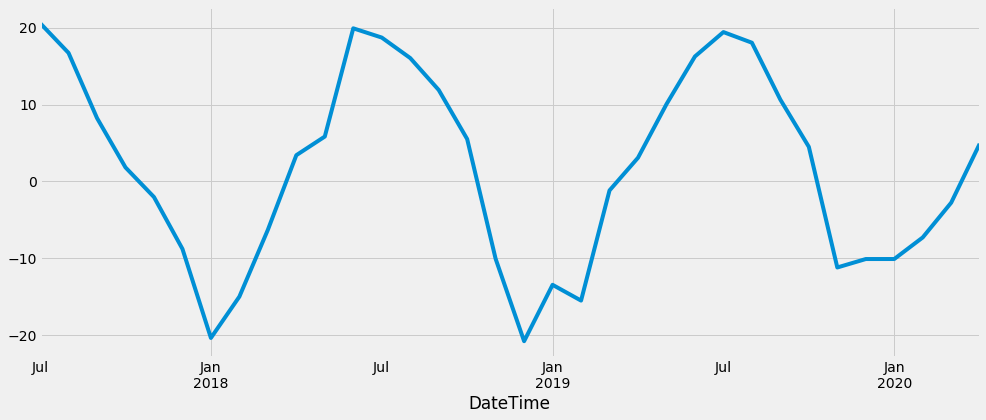

In [9]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#data = sm.datasets.co2.load_pandas()
#y = data.data

# y = df
# y.drop(y.columns.difference(['Tmean']), 1, inplace=True)

# # The 'MS' string groups the data in buckets by start of the month
# y = y['Tmean'].resample('D').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

print(y)

y.plot(figsize=(15, 6))
plt.show()


In [10]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:260.72959785072857
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:160.43168534979046
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:130.11080558622996
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:55.50284007463304
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:134.9719090104639
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:130.09558297980624
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:60.17182422023405
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:57.50289183885912
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:230.8798745872176
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:144.90940618091037
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:126.968606858854
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:51.6124419433836
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:136.94133191382767
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:126.84308089082447
ARIMA(0, 0, 1)x(1, 1, 0, 12)

In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

# results.plot_diagnostics(figsize=(15, 12))
# plt.show()


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2423      1.599      0.152      0.880      -2.892       3.377
ma.L1         -1.0000   1.45e+04  -6.91e-05      1.000   -2.84e+04    2.84e+04
ar.S.L12      -0.4049      0.435     -0.932      0.352      -1.257       0.447
ma.S.L12       0.9857   1.43e+05   6.87e-06      1.000   -2.81e+05    2.81e+05
sigma2         8.3160   1.29e+06   6.46e-06      1.000   -2.52e+06    2.52e+06


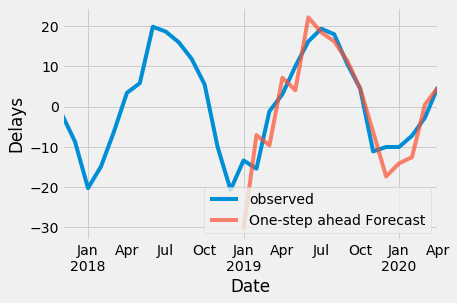

In [12]:

pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2017-10-30':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('Delays')
plt.legend()

plt.show()

In [13]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-11-02':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 21.94


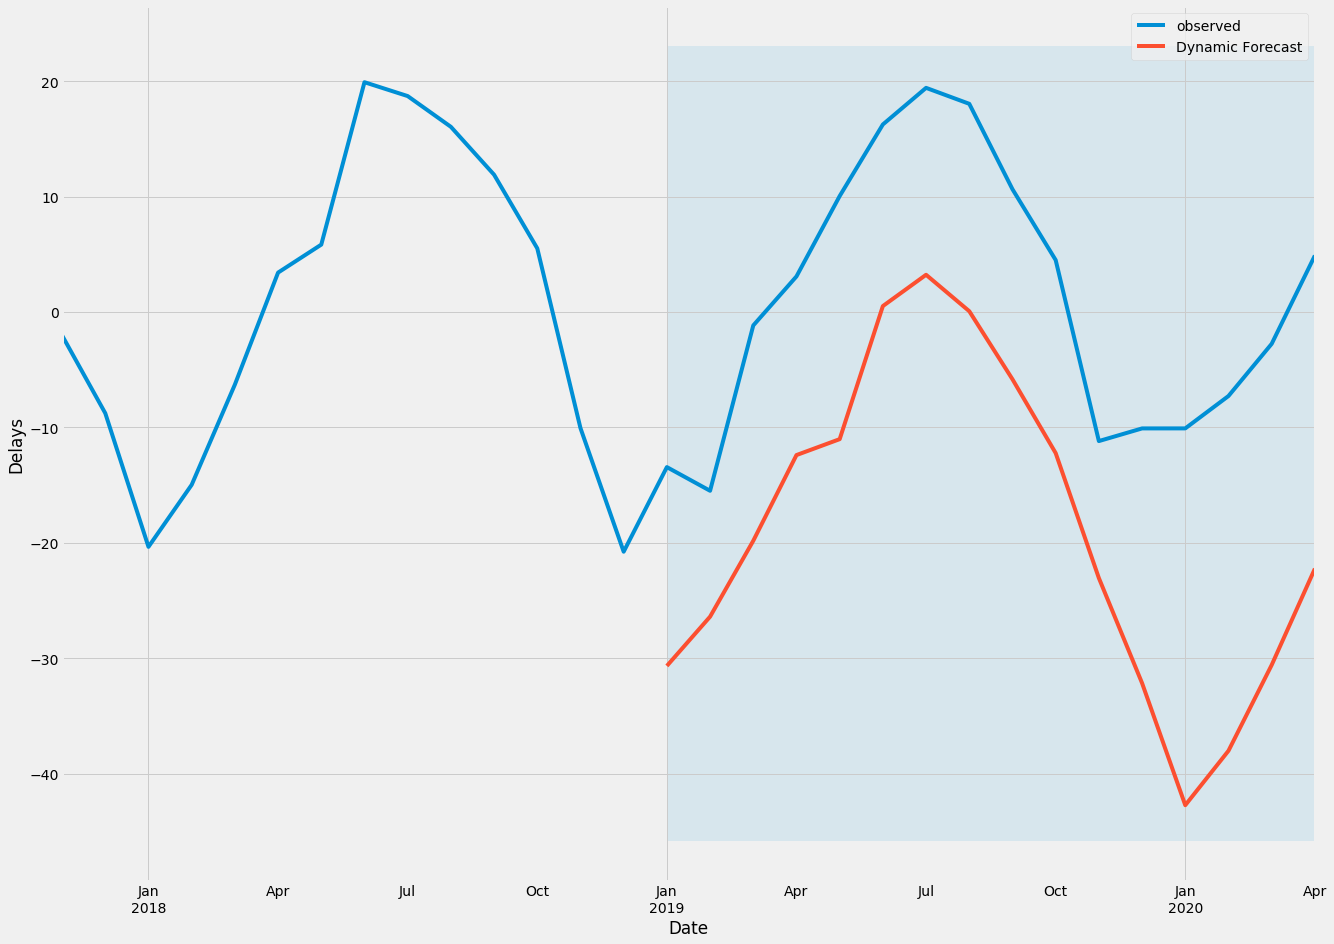

In [14]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2017-10-30':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Delays')

plt.legend()
plt.show()


The Mean Squared Error of our forecasts is 436.31
2020-05-01    18.437928
2020-06-01    27.943660
2020-07-01    27.333611
2020-08-01    26.326904
2020-09-01    19.492055
2020-10-01    13.385633
2020-11-01    -4.683114
2020-12-01    -3.265935
2021-01-01    -0.134642
2021-02-01     1.632104
2021-03-01     6.364457
2021-04-01    13.239532
2021-05-01    24.009986
2021-06-01    32.393003
2021-07-01    33.649863
2021-08-01    32.500450
2021-09-01    25.438003
2021-10-01    19.319891
2021-11-01     2.216485
2021-12-01     3.503905
2022-01-01     5.368023
2022-02-01     7.555732
2022-03-01    12.202849
2022-04-01    19.391729
2022-05-01    28.690044
2022-06-01    37.512809
2022-07-01    38.162114
2022-08-01    37.073746
2022-09-01    30.104279
2022-10-01    23.991100
2022-11-01     6.496851
2022-12-01     7.836829
Freq: MS, Name: upper Tmean, dtype: float64


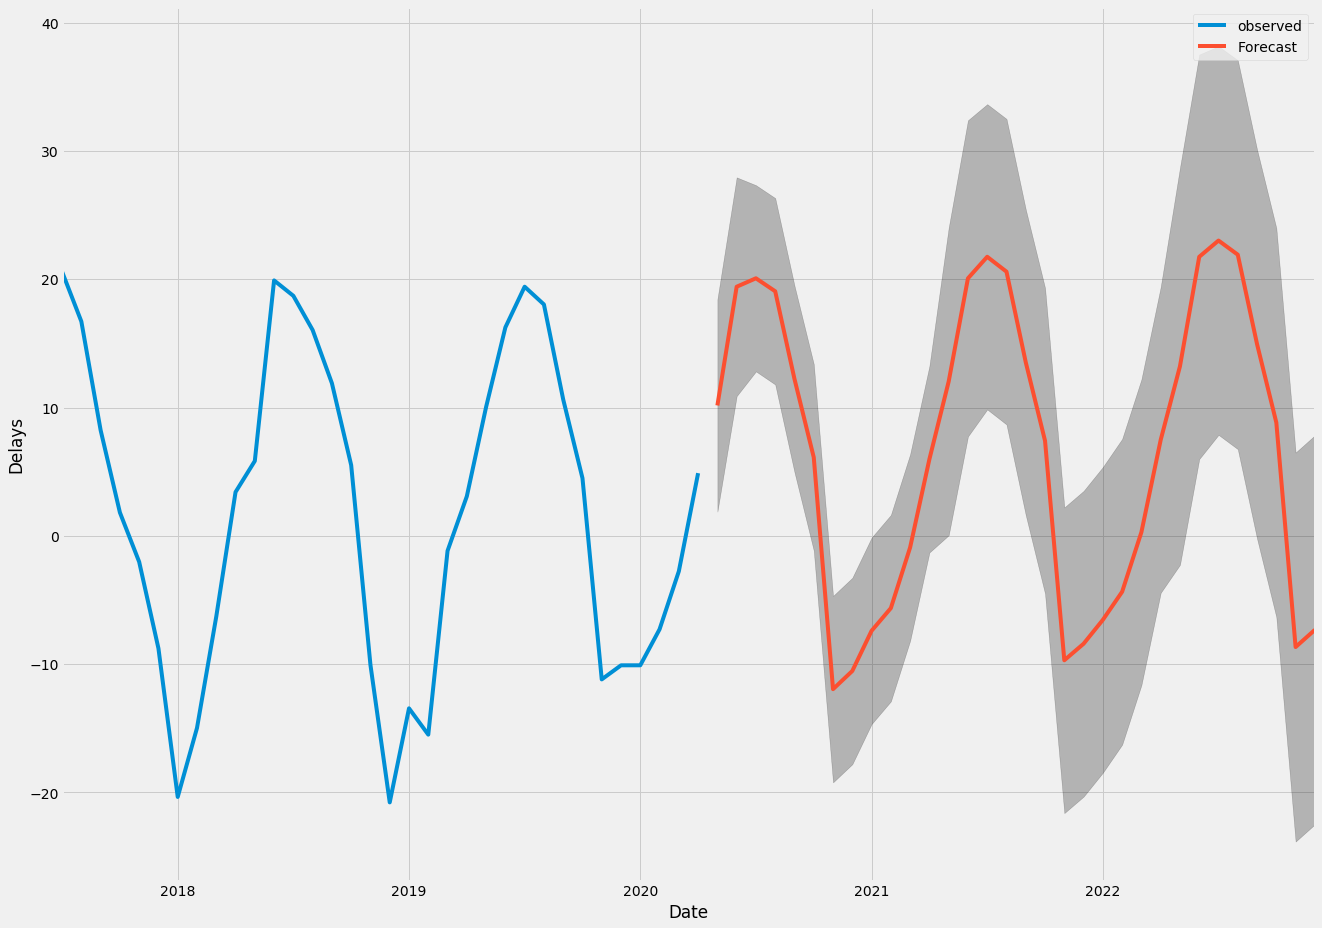

In [15]:

y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2019-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=32)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
print(pred_ci.iloc[:, 1])

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Delays')

plt.legend()
plt.show()